## Dijkstra      
### NBD - Data Centers
### Assignment n. 1    
- Tito Tamburini    1837335
- Angelo Mandara    2077139
- Claudiu Gheorghiu 1845227

#### Import of useful packages

In [1]:
import networkx as nx
import numpy as np
from collections import deque
import random as rd
import time
import matplotlib.pyplot as plt
import math
from heapq import heappop, heappush
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
our_seed =555 # to reproduce our results

## 1.1
### Generate p-ER random graphs and r-regular random graph.

In [3]:
def pER_graph(K,p,our_seed):
    return nx.erdos_renyi_graph(K,p,seed =our_seed)

In [4]:
def rregular_graph(K,r,our_seed):
        return nx.random_regular_graph(r, K, seed =our_seed)

In [5]:
#let's generate some examples
g1  =pER_graph(10,0.2,our_seed)
g2 = rregular_graph(10,3,our_seed)

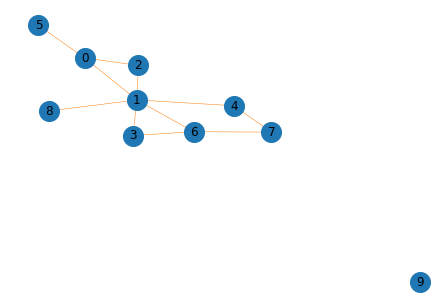

In [6]:
#visualize
nx.draw(g1, node_color='#1f77b4',edge_color='#ff7f0e',width=0.5,node_size=400,style='-', with_labels = True)

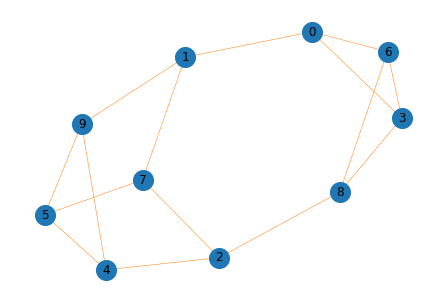

In [7]:
#visualize
nx.draw(g2, node_color='#1f77b4',edge_color='#ff7f0e',width=0.5,node_size=400,style='-', with_labels = True)

In [5]:
#we define a function to obtain the adjacency matrix of a given graph
def get_adjacency_matrix(graph):
    matrix = np.zeros((len(graph), len(graph)), dtype=int)  #initiate the matrix with all zeros
    for i in range(len(graph)):
        for j in graph[i]:                                  #if there is the edge, set equal 1
            matrix[i][j] = 1
    return matrix

In [ ]:
A1 = get_adjacency_matrix(g1)
A2 =  get_adjacency_matrix(g2)

## 1.2
### Write a script to check the connectivity of a given graph.
- algebraic method 1 (irreducibility);
- algebraic method 2 (eigenvalue of the Laplacian matrix);
- breadth-first search algorithm.


In [ ]:
#we generate the matrix D, diagonal matrix with degree of the node i in the position D[i,i]
def diagonal(A):
    degree = [sum(A[i,]) for i in range(len(A))]
    return np.diag(degree)

In [ ]:
#the laplacian matrix of A is obtained subtracting from D(defined previously) A
L1 = diagonal(A1) - A1
L2 = diagonal(A2) - A2

### Method 1: Irreducibility

It can be shown that an n × n matrix A is irreducible if

$I + A + A^2 + · · · + A^{n−1} > 0$

In [ ]:
def method1(A):
    result = np.zeros((len(A), len(A)), dtype=int)                  #initiate the matrix with all zeros
    for i in range(len(A)):
        result = np.add(np.linalg.matrix_power(A,i),result)         #we evaluate the i-th power and we sum it with the matrix obtained with 
                                                                    #the previous operations
    return np.min(result>0)                                         #check if all the elements of the obtained matrix are positive

In [ ]:
#check the method on the example
method1(A1)

False

In [ ]:
#check the method on the example
method1(A2)

True

### Method 2: Eigenvalues

For an undirected graph the number of connected components is
equal to the algebraic multiplicity of the smallest eigenvalue of the
graph Laplacian.

Let $η_1 = 0 ≤ η_2 ≤ · · · ≤ η_n$ denote the $n$ real, non-negative
eigenvalues of $L$.
The graph is connected if and only if $η_2 > 0$.

We will define a method thath will check this.

In [6]:
def method2(A):
    L = diagonal(A) - A                             #use the previously define function diagonal D and subtract A to obtain the Laplacian matrix
    eigenvalues = sorted(np.linalg.eigvals(L))      #use the already implemented function linalg.eigvals of numpy to obtain the eigenvalues of L
    return eigenvalues[1]> 1e-10                    #Use a small enough tolerance, this condition is important, otherwise the method will
                                                    #always return True

In [ ]:
#check the method on the example
method2(A1)

False

In [ ]:
#check the method on the example
method2(A2)

True

### Method 3: BFS

To check the connectivity of a graph using BFS, we start from any arbitrary vertex and traverse the graph using BFS. 

If we can visit all the vertices of the graph during the traversal, then the graph is connected. Otherwise, if there are some vertices that cannot be visited during the traversal, the graph is disconnected.

In [7]:
def method3(g):

    start_node = rd.choice(list(g.nodes())) #Random starting node
    Q = deque([start_node]) #Initialization of the queue
    visited  = [start_node] #Initialization of the visited list

    while Q:
        current_node = Q.popleft() #Remove first node from list
        for neighbor in g[current_node]: #Iterate on the neighbors node
            if neighbor not in visited:
                visited.append(neighbor)
                Q.append(neighbor)
    
    # check if all nodes are visited
    return len(visited) == len(g)

In [ ]:
#check the method on the example
method3(g1)

False

In [ ]:
#check the method on the example
method3(g2)

True

## 1.3
### Compare the complexity as a function of $K$ of the methods above by plotting curves of a complexity measure vs $K$.


We define a function that will take in input different parameters. We need to choose if we want to evaluate the complexity in the case of rregular graph or pER graph, passing a boolean value(isreegular), a value of p and r, seed(is needed since we need a fair comparison), which method to consider and the interval of the nodes $K$ to consider. We have choosen to pass also the range of the interval since in the case of the irreducible method will take very long time(the method is $O(K^3)$ complexity) to run from a value of 410. This choice won't change our comparison between the algorithm and won't change our final plot. 

In [8]:
def complexity(isrregular,p,r,our_seed,interval,method_number):
    times= []
    for k in tqdm(range(10, int(interval), 100)):       #generation of the chosen graph
        if(isrregular):
            g = rregular_graph(k,r,our_seed)        
        else:
            g  = pER_graph(k,p,our_seed)
                                                    
        if method_number==1:
          method=method1
          g = get_adjacency_matrix(g)
        if method_number==2:
          method=method2
          g = get_adjacency_matrix(g)
        if method_number==3:
          method=method3
        #Method i complexity
        start  = time.time()
        method(g)
        end = time.time() -start
        times.append(end)

    return times

In [ ]:
#we choose less node for irreducibility method since is esponential, the plot will be indicative anyway
#save the result for different method and different graph
irr_r = complexity(True,0.5,5,our_seed,410,1)
irr_per = complexity(False,0.5,5,our_seed,410,1)
eig_r = complexity(True,0.5,5,our_seed,3010,2)
eig_per = complexity(False,0.5,5,our_seed,3010,2)
bfs_r = complexity(True,0.5,5,our_seed,3010,3)
bfs_per = complexity(False,0.5,5,our_seed,3010,3)

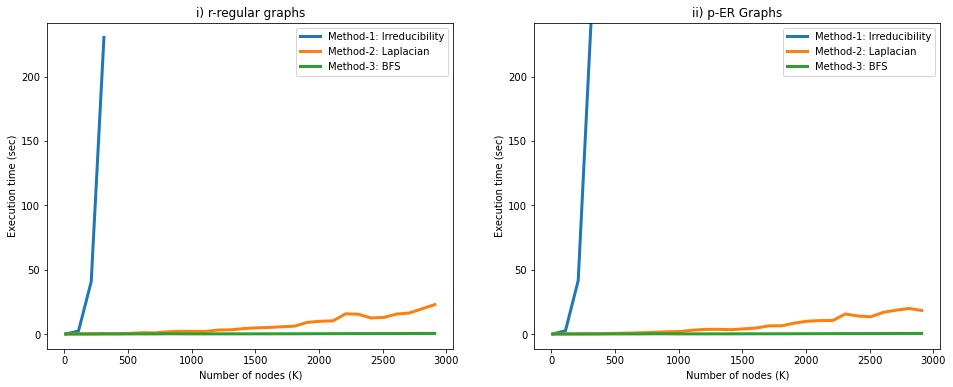

In [ ]:
#time to plot
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=(16, 6))

# Regular graphs
ax0.plot(range(10,410,100), irr_r, 'r-', color='C0', linestyle='-',  linewidth=3, label='Method-1: Irreducibility')
ax0.plot(range(10,3010,100), eig_r, 'g-', color='C1', linestyle='-', linewidth=3, label='Method-2: Laplacian')
ax0.plot(range(10,3010,100), bfs_r, 'b-', color='C2', linestyle='-', linewidth=3, label='Method-3: BFS')
ax0.set_xlabel("Number of nodes (K)")
ax0.set_ylabel("Execution time (sec)")
ax0.set_title('i) r-regular graphs')
ax0.legend()

# Random ER graphs
ax1.plot(range(10,410,100), irr_per, 'r-',  color='C0', linestyle='-',  linewidth=3, label='Method-1: Irreducibility')
ax1.plot(range(10,3010,100), eig_per, 'g-', color='C1', linestyle='-', linewidth=3, label='Method-2: Laplacian')
ax1.plot(range(10,3010,100), bfs_per, 'b-', color='C2', linestyle='-', linewidth=3, label='Method-3: BFS')
ax1.set_xlabel("Number of nodes (K)")
ax1.set_ylabel("Execution time (sec)")
ax1.set_title('ii) p-ER Graphs')
ax1.set_ylim(ax0.get_ylim())
ax1.legend()


plt.show()


## 1.4
Let $p_C(G)$ denote the probability that a graph $G$ is connected.
By running Monte Carlo simulations, estimate $p_C(G)$ and
produce two curve plots:
- $p_C(G)$ vs. $p$ for $Erdos-Renyi$ graphs with $K = 100$.
- $p_C(G)$ vs. $K$, for $K ≤ 100$, for $r$-regular random graphs with
$r = 2$ and $r = 8$.

Since we have obtained that BFS method(method3) is the best one among the ones considered, we will use this method to check if the graph generated is connected or not.

In the function *prob_complexity_er* we will pass $K$, number of nodes, interval of the probability (in our case will be from 0 to 1 of course, but we have added this parameter since we will check what happen also in a particular subinterval of $[0,1]$), and the step.

In [ ]:
def prob_complexity_er(K,interval,path):
  prob = np.arange(0, interval, path)
  count = np.zeros(len(prob))       #initiate the count vector
  for i,p in enumerate(prob):
    for _ in range(100):            #for each value of p 100 iterations
      g  = pER_graph(K,p,None)      #generate the graph
      count[i] += method3(g)*1      #check if is connected, and add the result(will add 0 or 1)
  #time to plot
  plt.figure(figsize=(10, 6))
  plt.plot(prob, count/100, 'r-', color='C0', linestyle='-', linewidth=3)
  plt.xlabel('values of probabilities p') # set x label
  plt.ylabel('# of obtained connectivities') # set y label
  plt.title("Probability of a connected p-ER random graph as a function of p for K = 100") # set title
  plt.show()


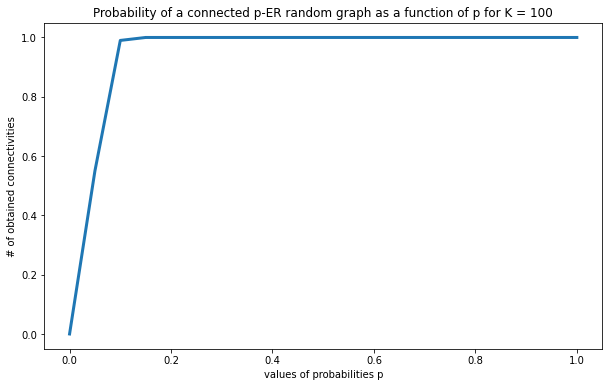

In [ ]:
prob_complexity_er(100,1.05,0.05)

Let's give more attention between 0 and 0.15.

Pay attention that the scale is from 0.99 to 1!

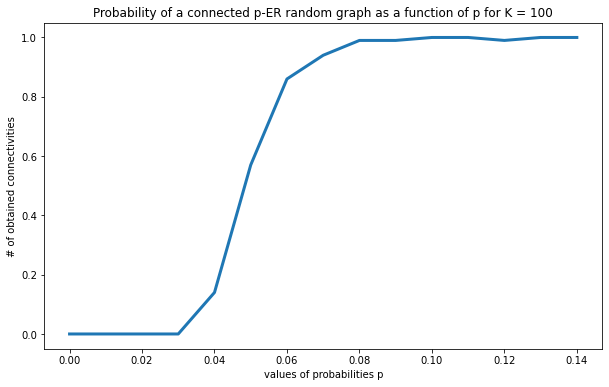

In [ ]:
prob_complexity_er(100,0.15,0.01)

### R-regular random graphs

Now we check the same,just on a $r$-regular graph.
We need to pass the value of $r$ to the $prob_complexity_er$ function.

In [ ]:
def prob_complexity_er(r):
  K = range(10,110,1)                     
  count = np.zeros(len(K))                #initiate the count vector
  for i,k in enumerate(K):
    if (r*k)%2==0:                        #this check is necessary
      for _ in range(100):                #repeat 100 times
        g  = rregular_graph(k,r,None)     #generate the graph
        count[i] += method3(g)*1          #check if is connected, and add the result(will add 0 or 1)
  #return the value of K and the rate
  return K,count/100

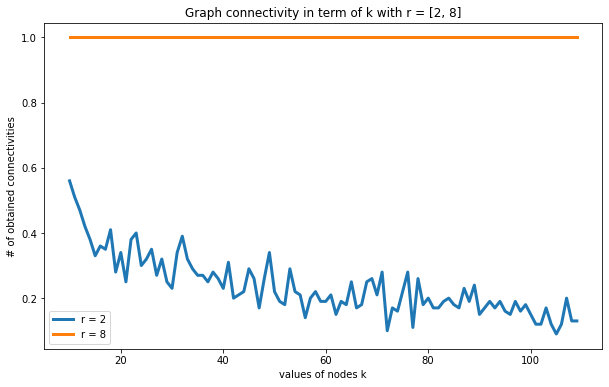

In [ ]:
R = [2, 8]
#time to plot
colors = ['C0', 'C1']
legend_labels = ['r = 2', 'r = 8']

plt.figure(figsize=(10, 6))
for i, r in enumerate(R):                 #iterate over the two values
  K, count = prob_complexity_er(r)
  plt.plot(K, count, color=colors[i], label=legend_labels[i],linewidth=3)
plt.xlabel('values of nodes k') # set x label
plt.ylabel('# of obtained connectivities') # set y label
plt.title("Graph connectivity in term of k with r = "+str(R)) # set title
plt.legend()
plt.show()


# Part 2

## Build Data Center Network

In [9]:
# Define constants
C = 10e9 #bit/s
tau = 5e-6 #s
Lf = 4e12 #bit 
Lo = 4e12 #bit
E_X = 8 * 3600 #s
T0 = 30 #s
xi = 0.1 #cost
f = 48 / 1500 #cost
n = 64 #number

#### Fat-Tree Topology

In [10]:
# Set the number of ports per switch
n = 64

# Calculate the number of core switches needed
num_core_switches = int(n/2)**2
num_pods = n 
num_aggr_switches = int(n/2)
num_edge_switches = int(n/2)
num_server = int(n/2)
# Create a new empty graph
fat = nx.Graph()
#let's start adding the core switches
for i in range(num_core_switches):
  fat.add_node(i,Type='core')

#let's add now the aggregators, are in number num_aggr_switches*num_pods
#and we have to add num_core_switches to not overlap the already inserted of type core switches  
for i in range(num_aggr_switches*num_pods):
  fat.add_node(i+num_core_switches,Type='aggr')

#let's add now the edges, are in number num_edge_switches*num_pods
#and we have to add num_core_switches+num_pods*num_aggr_switches(aggr+core types) to not overlap 
#the already inserted of type core switches and aggregators
for i in range(num_edge_switches*num_pods):
  fat.add_node(i+num_core_switches+num_pods*num_aggr_switches,Type='edge')

#now we have to add the edges, we need to connect each aggregator with the corresponding cores
#1st aggregator in the pod will connect to the first-n/2 cores, the 2nd with the second_n/2 cores and so on
#then we have to connect each aggregator with the corresponding edges in the same pod(are in number n/2)
#to do that we have to recover in with pod the aggregator is((number of node-num_core_switches)//num_aggregators)
#then to recover the initial edge in the pod we have to multiply the number obtained for the number of aggregators
#sum then the number of cores and switches(num_core_switches+num_pods*num_aggr_switches) and thanks to the
#iterator j we can range this number in all the edges in the pod 
for i in range(num_core_switches,num_core_switches+num_aggr_switches*n,1):
  for j in range(num_aggr_switches):
    #print(i,(i%num_aggr_switches)*num_aggr_switches+j)
    fat.add_edge(i,(i%num_aggr_switches)*num_aggr_switches+j)
    fat.add_edge(i,num_core_switches+num_pods*num_aggr_switches+((i-num_core_switches)//num_aggr_switches)*num_aggr_switches+j)

#fiinally for each edge we will add n/2 servers
count = num_core_switches+n*n
edge = [node for node in fat.nodes() if fat.nodes[node]['Type']=='edge']
for node in edge:
  for _ in range(int(n/2)):
    count += 1
    fat.add_node(count,Type='server')
    fat.add_edge(node,count)

Just some checks about number of nodes, degree and connectivity.

In [11]:
len(fat.nodes())==(n**3)/4+5*(n**2)/4

True

In [12]:
core = [node for node in fat.nodes() if fat.nodes[node]['Type']=='core']
aggr = [node for node in fat.nodes() if fat.nodes[node]['Type']=='aggr']
edge = [node for node in fat.nodes() if fat.nodes[node]['Type']=='edge']
server= [node for node in fat.nodes() if fat.nodes[node]['Type']=='server']

In [13]:
len(core)==num_core_switches

True

In [14]:
len(aggr)==num_aggr_switches*n

True

In [15]:
len(edge)==num_aggr_switches*n

True

In [16]:
len(server)==(n**3)/4

True

In [17]:
degree_core = [fat.degree(node) for node in fat.nodes() if fat.nodes[node]['Type']=='core']
degree_aggr = [fat.degree(node) for node in fat.nodes() if fat.nodes[node]['Type']=='aggr']
degree_edge = [fat.degree(node) for node in fat.nodes() if fat.nodes[node]['Type']=='edge']
degree_server=[fat.degree(node) for node in fat.nodes() if fat.nodes[node]['Type']=='server']

In [18]:
print(set(degree_core))
print(set(degree_aggr))
print(set(degree_edge))
print(set(degree_server))

{64}
{64}
{64}
{1}


In [19]:
def chooseA(fat,n):
    index = rd.randint(((n/2)**2)+n*n,(n**3)/4+5*(n**2)/4)
    return index

#### Jellyfish Topology

In [20]:
servers = len(server)
r = int(n/2)
K = int(len(fat.nodes()) - servers) #

In [21]:
jelly_servers = K * r

In [22]:
jelly = rregular_graph(K,r,None)

In [23]:
nx.set_node_attributes(jelly,'switch','Type')

In [24]:
switch_nodes = [node for node in jelly.nodes() if jelly.nodes()[node]['Type'] == 'switch']
server = K
for node in switch_nodes:
    cnt = 0
    while(cnt <r):
        jelly.add_node(server,Type='server')
        jelly.add_edge(node,server)
        server+=1
        cnt+=1

In [25]:
def chooseB(jelly,K):
    index = rd.randint(K,len(jelly.nodes()))
    return index

### Simulation Functions

In [26]:
def simulation(N,tree,tau,E_X,Lo,C,Lf,f,A,distances,nearest):
    T = np.zeros(N)
    nearest  = nearest[:N] #Find N nearest 
    ti  = [2*tau*x[1] for x in nearest]
    den = sum([1/t for t in ti]) #somma inversi ti
    theta  = [((1/t)/den)*C for t in ti  ]
    #Sample Xi from negative exponential
    Xi = np.random.exponential(scale=  E_X/N,size = N)
    #Sample Loi from uniform
    Lo =  np.random.uniform(0,2*Lo/N,size=N)
    L = [(Lf/N +Loi)*(1+f) for Loi in Lo] #Total data transferred
    for i in range(len(L)):
        T[i] = L[i]/theta[i]  #Time to transfer data
    R  = T0 + max(T+Xi)
    X = [xi+T0 for xi in Xi]
    theta  =sum(X)
    return R,theta

In [28]:
#N_vec  = list(range(1,10100,100))
N_vec  = list(range(1,10001,1))

In [29]:
def simulate_fat(N):
    #we calculated just one time the neighbours and we pass this list to the function simulation
    #this will speed up a lot the calculation, since fat tree is deterministic there is no reason to 
    #use every time dijkstra 
    A = chooseA(fat,n)
    distances_fat = nx.shortest_path_length(fat, source=A)
    nearest_fat = []
    for node,dist in distances_fat.items():
      if fat.nodes()[node]['Type'] == 'server' and node!= A:
        nearest_fat.append((node,dist))
    r = []
    t = []
    for _ in range(100):
        res = simulation(N, fat, tau, E_X, Lo, C, Lf, f, A,distances_fat,nearest_fat)
        r.append(res[0])
        t.append(res[1])
    return np.mean(r), np.mean(t)

In [30]:
def simulate_jelly(N):
    r = []
    t = []
    #differently from fat tree that is deterministic, we add randomicity about the
    #choice of the server A
    for _ in range(100):
        A = chooseB(jelly,K)
        distances_jelly = nx.shortest_path_length(jelly, source=A)
        nearest_jelly = []
        for node,dist in distances_jelly.items():
          if jelly.nodes()[node]['Type'] == 'server' and node!= A:
            nearest_jelly.append((node,dist))
        res = simulation(N, jelly, tau, E_X, Lo, C, Lf, f, A,distances_jelly,nearest_jelly)
        r.append(res[0])
        t.append(res[1])
    return np.mean(r), np.mean(t)

100%|██████████| 10000/10000 [2:49:28<00:00,  1.02s/it]


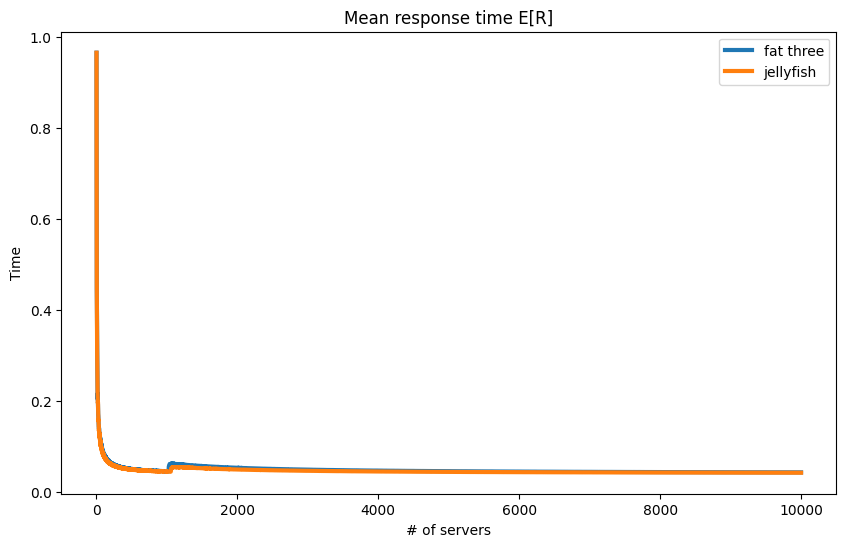

In [31]:
# example list of N values
#we parallelize to speed up, saving the result for fat tree and jellyfish
#and passing the arguments for the plot.
#N_vec  = range(1,10100,100)

R = []
T = []
with ProcessPoolExecutor() as executor:
    results = list(tqdm(executor.map(simulate_fat, N_vec), total=len(N_vec)))

for r, t in results:
    R.append(r)
    T.append(t)
  
R2 = []
T2 = []
with ProcessPoolExecutor() as executor:
    results2 = list(tqdm(executor.map(simulate_jelly, N_vec), total=len(N_vec)))


for r, t in results2:
    R2.append(r)
    T2.append(t)

## calculate S and R_base values
xi_T = [Ti*xi for Ti in T]
S = np.add(R, xi_T)
#we choose size = 100 since we simulate for each node 100 times 
R_base = T0 + np.mean(np.random.exponential(scale=  E_X,size = 100))
#we normalize
R = [r/R_base for r in R]

xi_T2 = [t*xi for t in T2]
S2 = np.add(R2, xi_T2)
R2 = [r/R_base for r in R2]

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(N_vec, R, color='C0', label='fat three',linewidth=3)
plt.plot(N_vec, R2, color='C1', label='jellyfish',linewidth=3)
plt.xlabel('# of servers') # set x label
plt.ylabel('Time') # set y label
plt.title("Mean response time E[R]") # set title
plt.legend()
plt.show()

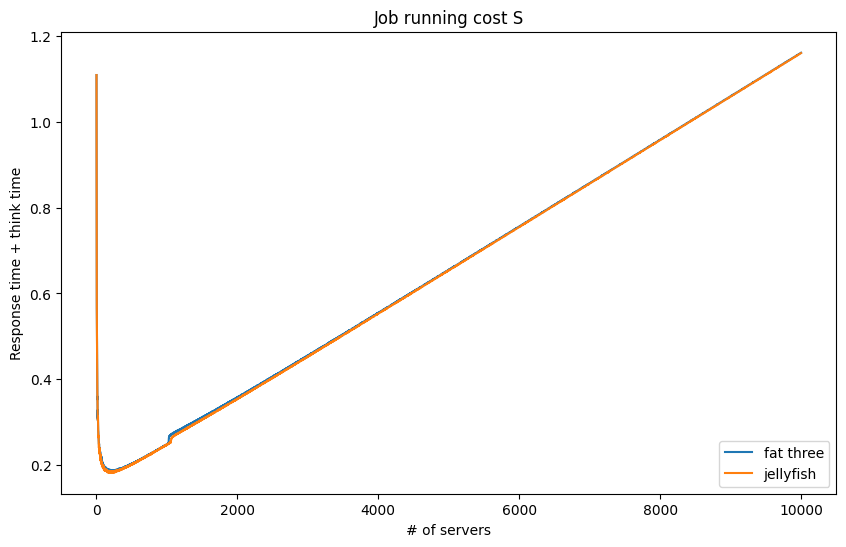

In [32]:
#again as before we choose size = 100 
Work_A = np.mean(np.random.exponential(scale=  E_X,size = 100))
#calculation of S_base
S_base = T0+Work_A+Work_A*xi
#we normalize
S_1 = [s/S_base for s in S]
S_2 = [s/S_base for s in S2]
plt.figure(figsize=(10, 6))
plt.plot(N_vec, S_1, label='fat three')
plt.plot(N_vec, S_2, label='jellyfish')
plt.xlabel('# of servers')
plt.ylabel('Response time + think time')
plt.title('Job running cost S')
plt.legend()
plt.show()

Now we want to obtain the value of servers for which we obtain the minimum Job running cost(for the fat tree and jellyfish):

In [33]:
min_fat = N_vec[S_1.index(min(S_1))]
min_jelly = N_vec[S_2.index(min(S_2))]
print('The # of server for the fat tree topology for which we obtain the minimim is :',min_fat)
print('The # of server for the jellyfish topology for which we obtain the minimim is :',min_jelly)

The # of server for the fat tree topology for which we obtain the minimim is : 192
The # of server for the jellyfish topology for which we obtain the minimim is : 191
